In [215]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

from datetime import datetime
from dateutil.parser import parse
import pytz

# set a seaborn style of your taste
sns.set_style("whitegrid")

In [216]:
# import Uber Request Data.csv file to a dataframe Uber
Uber = pd.read_csv("Uber Request Data.csv", sep = ',')  # code for importing the csv file
Uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [217]:
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [218]:
# check the count of null values in each column
Uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [219]:
# check the percentage of count of null values in each column
round(100*(Uber.isnull().sum()/len(Uber.index)),2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

## Univariate Analysis

In [220]:
# check the values of pickup point and count of trips
Uber.pivot_table(values = 'Request id', index = 'Pickup point', aggfunc = 'count').sort_values(by = 'Pickup point', ascending = False)

,Request id
Pickup point,
City,3507
Airport,3238


In [221]:
# check the values of Driver id column
Uber.pivot_table(values = 'Request id', index = 'Driver id', aggfunc = 'count').sort_values(by = 'Driver id', ascending = False)

,Request id
Driver id,
300.0,6
299.0,12
298.0,15
297.0,15
296.0,14
295.0,12
294.0,14
293.0,8
292.0,8


In [222]:
# check the values of status and count in each status type
Uber.pivot_table(values = 'Request id', index = 'Status', aggfunc = 'count')

,Request id
Status,
Cancelled,1264
No Cars Available,2650
Trip Completed,2831


In [223]:
#convert the format of date-time columns 
Uber['Request timestamp'] = pd.to_datetime(Uber['Request timestamp'], dayfirst = True)
Uber['Drop timestamp'] = pd.to_datetime(Uber['Drop timestamp'], dayfirst = True)
Uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [224]:
# Verify wheather the "Driver id" is null for all records with status "No Cars Available" 
Uber[Uber.Status == 'No Cars Available']['Driver id'].unique()

array([nan])

In [225]:
# Verify wheather the "Drop timestamp" is null for all records with status "No Cars Available" 
Uber[Uber.Status == 'No Cars Available']['Drop timestamp'].unique()

array(['NaT'], dtype='datetime64[ns]')

## Derived Metrics

In [226]:
Uber['Duration_in_min'] = (Uber['Drop timestamp'] - Uber['Request timestamp']).astype('timedelta64[m]')
Uber['Request_hour'] = Uber['Request timestamp'].dt.hour
Uber['Drop_hour'] = Uber['Drop timestamp'].dt.hour
Uber['DayName'] = Uber['Request timestamp'].dt.weekday_name

In [227]:
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Duration_in_min      2831 non-null float64
Request_hour         6745 non-null int64
Drop_hour            2831 non-null float64
DayName              6745 non-null object
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 527.0+ KB


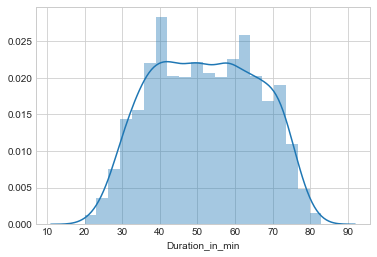

In [228]:
sns.distplot(Uber[Uber.Status == 'Trip Completed']['Duration_in_min'])
plt.show()

In [229]:
Trip_pickup = pd.crosstab(Uber[Uber['Status'] == 'Cancelled']['Request_hour'], Uber[Uber['Status'] == 'Cancelled']['Pickup point'])
Trip_pickup

Pickup point,Airport,City
Request_hour,,
0,0,3
1,0,4
2,0,5
3,0,2
4,2,49
5,4,172
6,4,141
7,5,164
8,2,176


In [230]:
Trip_pickup = pd.crosstab(Uber['Request_hour'], Uber['Pickup point'])
Trip_pickup

Pickup point,Airport,City
Request_hour,,
0,53,46
1,42,43
2,41,58
3,45,47
4,72,131
5,92,353
6,89,309
7,83,323
8,73,350


In [231]:
# Create 2 new Dataframes (UberA, UberC) with trips from Airport and trips from city respectively
UberA = Uber[Uber['Pickup point']=='Airport']
UberC = Uber[Uber['Pickup point']=='City']

In [232]:
UberA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3238 entries, 0 to 6744
Data columns (total 10 columns):
Request id           3238 non-null int64
Pickup point         3238 non-null object
Driver id            1525 non-null float64
Status               3238 non-null object
Request timestamp    3238 non-null datetime64[ns]
Drop timestamp       1327 non-null datetime64[ns]
Duration_in_min      1327 non-null float64
Request_hour         3238 non-null int64
Drop_hour            1327 non-null float64
DayName              3238 non-null object
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 278.3+ KB


In [233]:
UberC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3507 entries, 2 to 6743
Data columns (total 10 columns):
Request id           3507 non-null int64
Pickup point         3507 non-null object
Driver id            2570 non-null float64
Status               3507 non-null object
Request timestamp    3507 non-null datetime64[ns]
Drop timestamp       1504 non-null datetime64[ns]
Duration_in_min      1504 non-null float64
Request_hour         3507 non-null int64
Drop_hour            1504 non-null float64
DayName              3507 non-null object
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 301.4+ KB


In [234]:
StatusA = pd.crosstab(UberA['Request_hour'],UberA['Status'])
StatusC = pd.crosstab(UberC['Request_hour'],UberC['Status'])

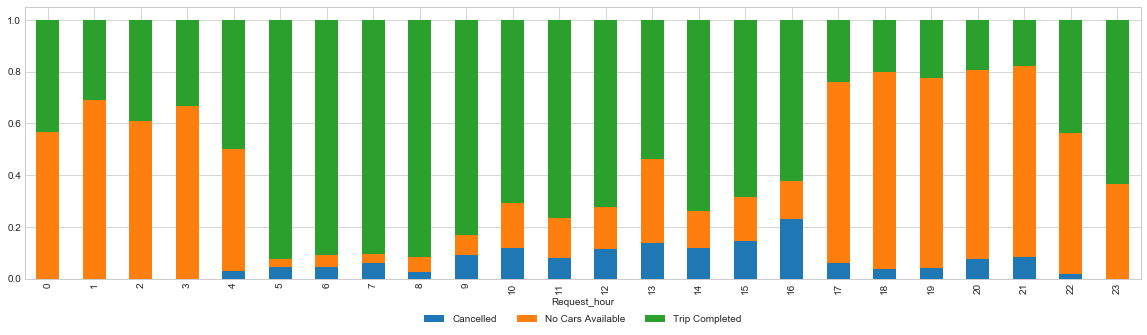

In [235]:
StatusA.div(StatusA.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,5))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)

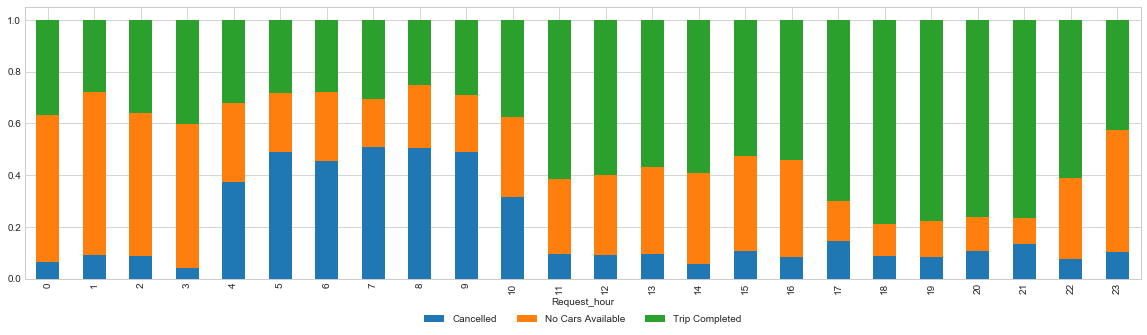

In [236]:
StatusC.div(StatusC.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,5))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=3)

In [237]:
StatusC

Status,Cancelled,No Cars Available,Trip Completed
Request_hour,,,
0,3,26,17
1,4,27,12
2,5,32,21
3,2,26,19
4,49,40,42
5,172,81,100
6,141,82,86
7,164,60,99
8,176,86,88


### Plots to view hourly trips data for airport to city trips

In [238]:
# Create a Dataframe to view Demand and supply data for airport to city trips
Trip_statusA = StatusA.reset_index('Request_hour')
Trip_statusA['Demand'] = Trip_statusA['Cancelled'] + Trip_statusA['No Cars Available'] + Trip_statusA['Trip Completed']
Trip_statusA['Supply'] = Trip_statusA['Trip Completed']

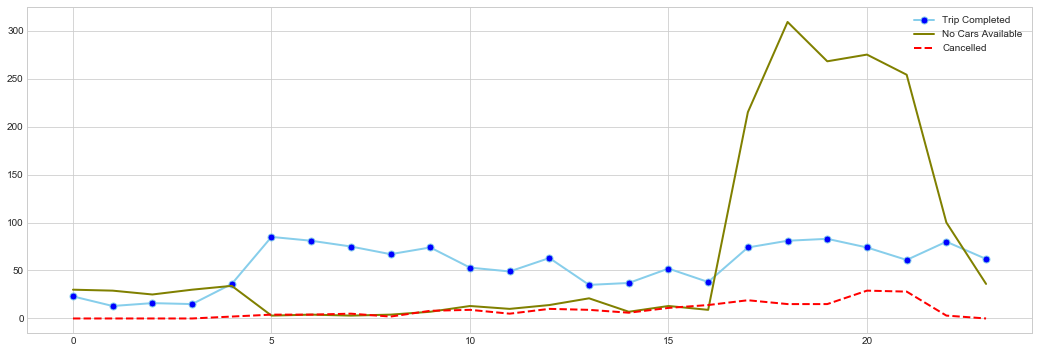

In [239]:
# multiple line plot to view trips with different status for trips from airport to city
plt.figure(figsize=(18,6))
plt.plot( 'Request_hour', 'Trip Completed', data=Trip_statusA, marker='o', markerfacecolor='blue', markersize=7, color='skyblue', linewidth=2)
plt.plot( 'Request_hour', 'No Cars Available', data=Trip_statusA, marker='', color='olive', linewidth=2)
plt.plot( 'Request_hour', 'Cancelled', data=Trip_statusA, marker='', color='red', linewidth=2, linestyle='dashed')
plt.legend()

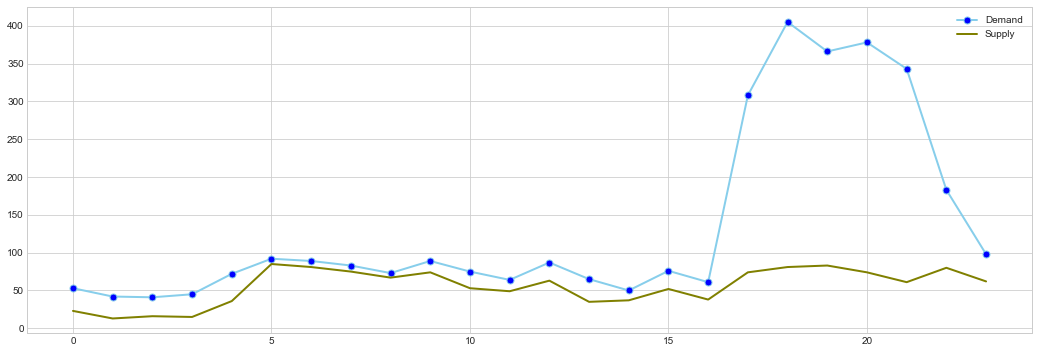

In [240]:
# multiple line plot to view Demand and supply gap for trips from airport to city
plt.figure(figsize=(18,6))
plt.plot( 'Request_hour', 'Demand', data=Trip_statusA, marker='o', markerfacecolor='blue', markersize=7, color='skyblue', linewidth=2)
plt.plot( 'Request_hour', 'Supply', data=Trip_statusA, marker='', color='olive', linewidth=2)
plt.legend()

### Plots to view hourly trips data for city to airport trips

In [241]:
# Create a Dataframe to view Demand and supply data for city to airport trips
Trip_statusC = StatusC.reset_index('Request_hour')
Trip_statusC['Demand'] = Trip_statusC['Cancelled'] + Trip_statusC['No Cars Available'] + Trip_statusC['Trip Completed']
Trip_statusC['Supply'] = Trip_statusC['Trip Completed']

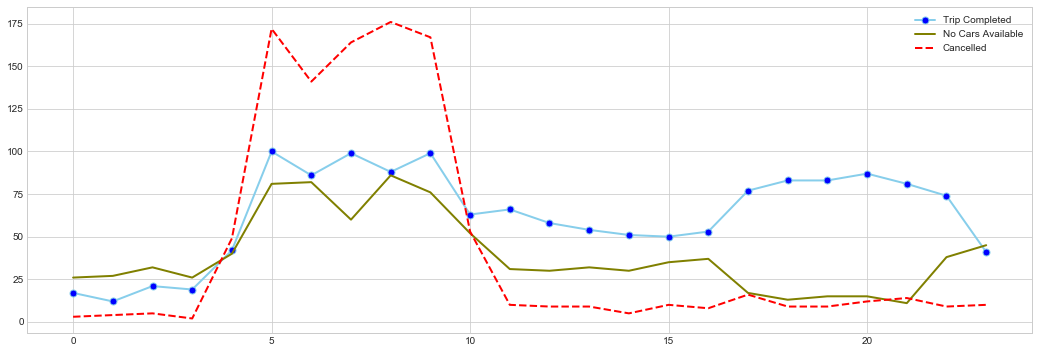

In [242]:
# multiple line plot to view trips with different status for trips from city to airport
plt.figure(figsize=(18,6))
plt.plot( 'Request_hour', 'Trip Completed', data=Trip_statusC, marker='o', markerfacecolor='blue', markersize=7, color='skyblue', linewidth=2)
plt.plot( 'Request_hour', 'No Cars Available', data=Trip_statusC, marker='', color='olive', linewidth=2)
plt.plot( 'Request_hour', 'Cancelled', data=Trip_statusC, marker='', color='red', linewidth=2, linestyle='dashed')
plt.legend()

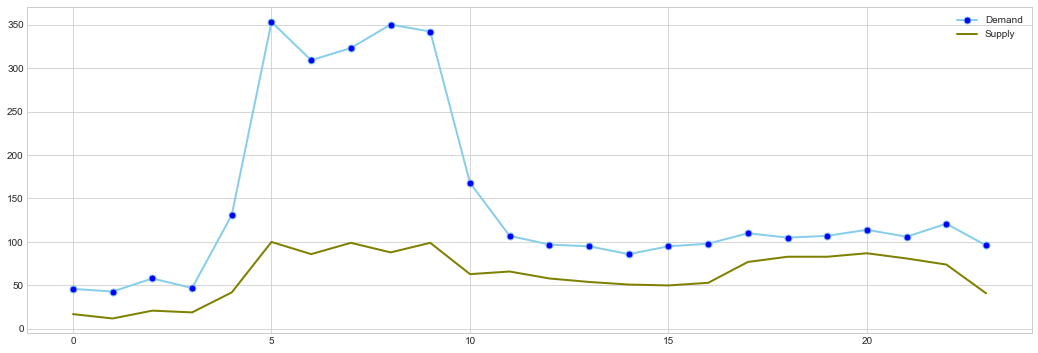

In [243]:
# multiple line plot to view Demand and supply gap for trips from city to airport
plt.figure(figsize=(18,6))
plt.plot( 'Request_hour', 'Demand', data=Trip_statusC, marker='o', markerfacecolor='blue', markersize=7, color='skyblue', linewidth=2)
plt.plot( 'Request_hour', 'Supply', data=Trip_statusC, marker='', color='olive', linewidth=2)
plt.legend()

Check the drivers who has made more cancellation percentage

In [244]:
Driver_status = pd.crosstab(Uber['Driver id'],Uber['Status'])
Driver_status = Driver_status.reset_index('Driver id')
Driver_status['Cancellation_percentage'] = Driver_status['Cancelled']/(Driver_status['Trip Completed'] + Driver_status['Cancelled'])
Driver_status_attention = Driver_status[Driver_status.Cancellation_percentage > 0.5]
Driver_status_attention

Status,Driver id,Cancelled,Trip Completed,Cancellation_percentage
53,54.0,11,8,0.578947
61,62.0,7,6,0.538462
83,84.0,12,9,0.571429
102,103.0,7,5,0.583333
103,104.0,7,5,0.583333
130,131.0,8,6,0.571429
134,135.0,6,5,0.545455
137,138.0,9,8,0.529412
165,166.0,9,8,0.529412
205,206.0,10,7,0.588235


In [246]:
Driver_status_attention['Driver id'].unique()

array([ 54.,  62.,  84., 103., 104., 131., 135., 138., 166., 206., 210.,
       229., 267.])

In [247]:
Driver_status[Driver_status['Trip Completed'] < 5]

Status,Driver id,Cancelled,Trip Completed,Cancellation_percentage
116,117.0,4,4,0.5


In [248]:
Driver_status['Cancellation_percentage'].describe(percentiles= [0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    300.000000
mean       0.304437
std        0.121767
min        0.000000
30%        0.235294
40%        0.266667
50%        0.297059
60%        0.333333
70%        0.367045
80%        0.411765
90%        0.466667
max        0.600000
Name: Cancellation_percentage, dtype: float64

Plot a boxplot to view drivers Cancellation_percentage

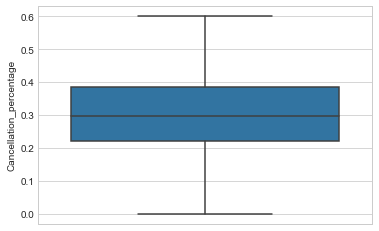

In [249]:
sns.boxplot(y=Driver_status['Cancellation_percentage'])
plt.show()

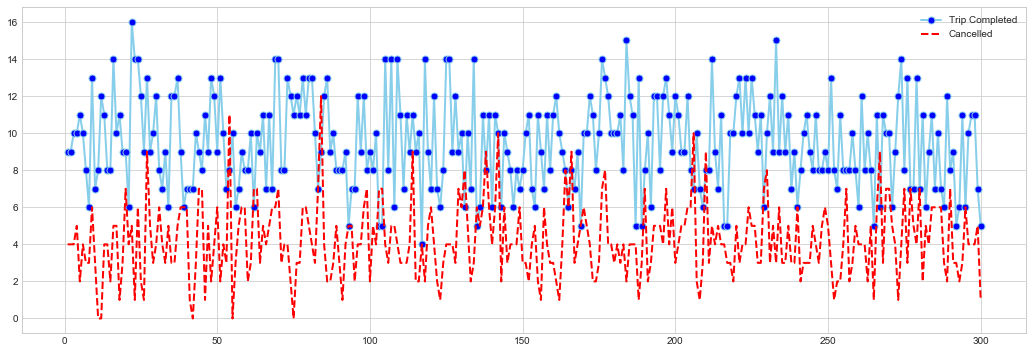

In [250]:
plt.figure(figsize=(18,6))
plt.plot( 'Driver id', 'Trip Completed', data=Driver_status, marker='o', markerfacecolor='blue', markersize=7, color='skyblue', linewidth=2)
plt.plot( 'Driver id', 'Cancelled', data=Driver_status, marker='', color='red', linewidth=2, linestyle='dashed')
plt.legend()

In [251]:
hour_bins = [-1, 4, 11, 16, 21, 23]
bin_names = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']
Uber['TimeOfDayBin'] = pd.cut(Uber['Request_hour'], 
                            labels=bin_names, bins=hour_bins)
Uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Duration_in_min,Request_hour,Drop_hour,DayName,TimeOfDayBin
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.0,11,13.0,Monday,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0,17,18.0,Monday,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0,9,9.0,Tuesday,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0,21,22.0,Tuesday,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.0,8,9.0,Wednesday,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,31.0,21,22.0,Wednesday,Evening
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,57.0,6,7.0,Thursday,Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,56.0,5,6.0,Friday,Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,53.0,17,18.0,Friday,Evening
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,39.0,6,7.0,Monday,Morning


## Analysis of trips based on time of day

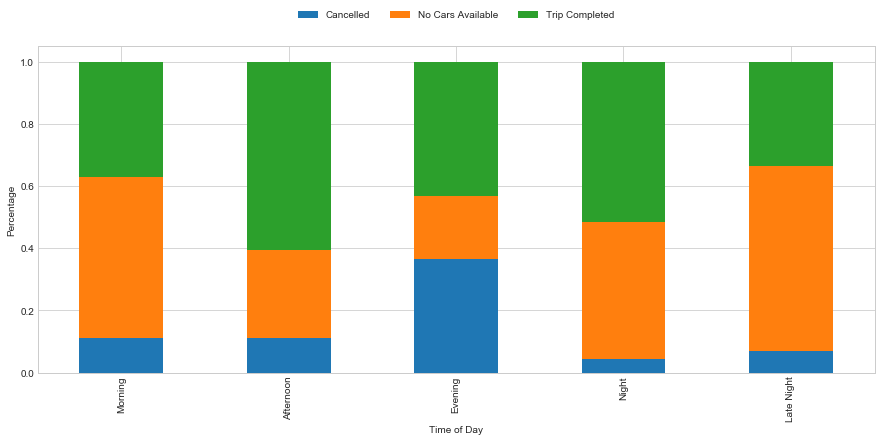

In [252]:
custom_dict = {'Morning':0, 'Afternoon':1, 'Evening':2, 'Night':3, 'Late Night':4}
day_bin=pd.crosstab(Uber['TimeOfDayBin'],Uber['Status'])
day_bin = pd.DataFrame(day_bin, index=sorted(custom_dict, key=custom_dict.get))
day_bin.div(day_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,6))
plt.xlabel('Time of Day')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=9,
           ncol=3, borderaxespad=0.)

## Analysis based on day of the week

In [253]:
Day_statusDS = pd.crosstab(Uber['DayName'],UberC['Status'])
Day_statusDS = Day_statusDS.reset_index('DayName')
Day_statusDS['Demand'] = Day_statusDS['Cancelled'] + Day_statusDS['No Cars Available'] + Day_statusDS['Trip Completed']
Day_statusDS['Supply'] = Day_statusDS['Trip Completed']
Day_statusDS = Day_statusDS.loc[:,('DayName','Demand','Supply')]
Day_statusDS

Status,DayName,Demand,Supply
0,Friday,752,293
1,Monday,706,320
2,Thursday,752,339
3,Tuesday,623,273
4,Wednesday,674,279


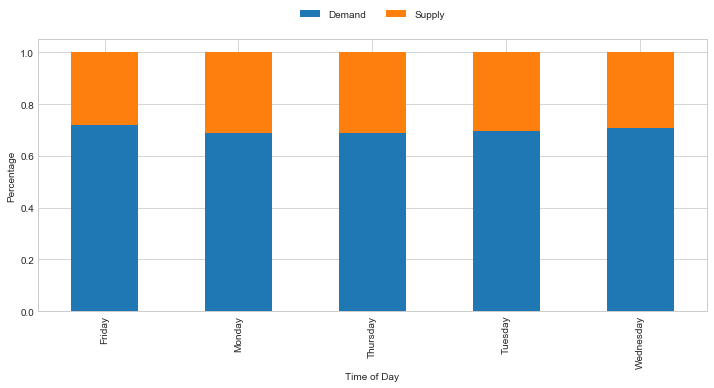

In [254]:
Day_statusDS = Day_statusDS.set_index('DayName')
Day_statusDS.div(Day_statusDS.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(12,5))
plt.xlabel('Time of Day')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=9,
           ncol=3, borderaxespad=0.)

In [255]:
Day_status = pd.crosstab(UberA['Request_hour'],UberA['DayName'])
Day_status = Day_status.reset_index('Request_hour')
Day_status

DayName,Request_hour,Friday,Monday,Thursday,Tuesday,Wednesday
0,0,11,7,12,10,13
1,1,11,10,6,5,10
2,2,8,7,9,8,9
3,3,8,6,7,9,15
4,4,13,17,8,18,16
5,5,21,20,14,20,17
6,6,10,18,8,27,26
7,7,16,13,6,26,22
8,8,11,14,13,19,16
9,9,15,16,13,27,18


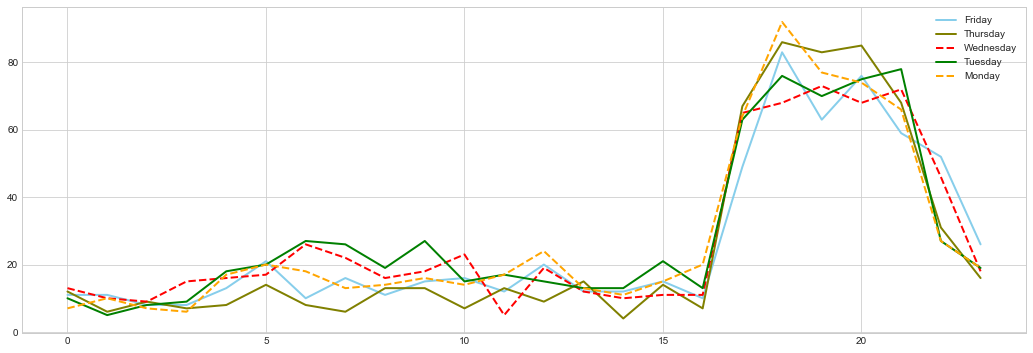

In [256]:
plt.figure(figsize=(18,6))
plt.plot( 'Request_hour', 'Friday', data=Day_status, marker='', color='skyblue', linewidth=2)
plt.plot( 'Request_hour', 'Thursday', data=Day_status, marker='', color='olive', linewidth=2)
plt.plot( 'Request_hour', 'Wednesday', data=Day_status, marker='', color='red', linewidth=2, linestyle='dashed')
plt.plot( 'Request_hour', 'Tuesday', data=Day_status, marker='', color='green', linewidth=2)
plt.plot( 'Request_hour', 'Monday', data=Day_status, marker='', color='orange', linewidth=2, linestyle='dashed')
plt.legend()